In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
possible_actions = [[0, 1], [0, 1]]
next_states = [[1, 1], [0, 1]]
rewards = [[-1, 0], [0, 1]]
#rewards = [[-1, -.5], [-.5, 1]]
gamma = 0.95 #discount factor
alpha0 = 0.05 #initial learning rate
decay = 0.005 #learning rate decay
state = 0 #initial state

In [ ]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

In [ ]:
Q_values = np.full((2,2), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0 #possible actions initialized to 0
print(Q_values)

for iteration in range(100000):
    action = exploration_policy(state)
    next_state = next_states[state][action]
    reward = rewards[state][action]
    alpha = alpha0 / (1 + iteration * decay)
    if reward != 1 and reward != -1:
        next_value = Q_values[next_state].max()
    else:
        next_value = 0 #you died or won, so there is no future
    Q_values[state, action] = (1 - alpha) * Q_values[state, action] + alpha * (reward + gamma * next_value)
    state = next_state


print(Q_values)

[[0. 0.]
 [0. 0.]]
[[-0.99997338  0.94994014]
 [ 0.90238575  1.        ]]


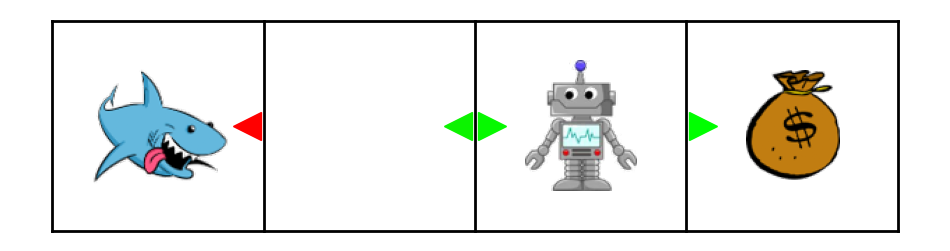

In [ ]:
colors = (Q_values + 1)/2

fig, ax = plt.subplots(figsize=(12, 3))  # Adjust size for a horizontal layout
for i in range(5):
    ax.plot([i/4, i/4], [0, 1], color='black', linewidth=2)
ax.plot([0, 1], [0, 0], color='black', linewidth=2)
ax.plot([0, 1], [1, 1], color='black', linewidth=2)

ax.axis('off')

y = 0.5
z = 1.0

shark = image.imread('drive/MyDrive/shark.png')
imagebox1 = OffsetImage(shark, zoom = z)
ab1 = AnnotationBbox(imagebox1, (0.125, y), frameon = False)

robot = image.imread('drive/MyDrive/robot.png')
imagebox2 = OffsetImage(robot, zoom = z)
ab2 = AnnotationBbox(imagebox2, (0.625, y), frameon = False)

money = image.imread('drive/MyDrive/money.png')
imagebox3 = OffsetImage(money, zoom = z)
ab3 = AnnotationBbox(imagebox3, (0.875, y), frameon = False)

ax.add_artist(ab1)
ax.add_artist(ab2)
ax.add_artist(ab3)

ax.plot(0.23, y, "<", markersize = 20, color = [1-colors[0, 0], colors[0, 0], 0])
ax.plot(0.52, y, ">", markersize = 20, color = [1-colors[0, 1], colors[0, 1], 0])
ax.plot(0.48, y, "<", markersize = 20, color = [1-colors[1, 0], colors[1, 0], 0])
ax.plot(0.77, y, ">", markersize = 20, color = [1-colors[1, 1], colors[1, 1], 0])
ax.axis('off')
plt.show()